
A periodic function, $f(t)$, can be written as a Fourier series,

 \begin{equation*}
f(t) = \frac{1}{2} a_0 + \sum_{n=1}^\infty (a_n \cos n \omega_0 t +
b_n \sin n \omega_0 t)
\end{equation*}

where $\omega_0$ is the fundamental angular frequency given by

\begin{equation*}
\omega_0 = \frac{2 \pi}{T}
\end{equation*}

The Fourier coefficients are given by

\begin{align*}
a_n &= \frac{2}{T} \int_{-T/2}^{T/2} f(t) \cos n \omega_0 t dt\\
b_n &= \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin n \omega_0 t dt
\end{align*}

where $\frac{1}{2} a_0$ is the average value of $f(t)$.



# Problem 1  
The method for evaluating the coefficients is known as "Fourier's trick".  Start with the Fourier $\sin$ series. Multiply both sides of the equation by $\sin(m \omega_o t)$ and integrate the periodic function over one full period. i.e.,

\begin{equation*}
\int_{-T/2}^{T/2} f(t) \sin( m \omega_o t) dt = \int_{-T/2}^{T/2}\sum_{n=1}^\infty 
b_n \sin( n \omega_o t) \sin( m \omega_o t) dt
\end{equation*}

Show that

\begin{align*}
b_n &= \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin n \omega_0 t dt.
\end{align*}

Feel free to use numerical integration!  Otherwise, demonstrate "Fourier's trick" analytically.  It turns out that $\cos$ and $\sin$ functions are *orthogonal* functions (i.e., $\int \sin(m \omega_o t) \sin(n \omega_o t) dt \ne 0$ for $m = n$).  Think of $\sin$ and $\cos$ as basis functions for an infinite dimensional vector space (continuous functions).  Any function can be described with these basis functions, just as any point in 3-space can be described in terms of the vector sum of multiples of the unit *basis* vectors $\hat{x}$, $\hat{y}$, $\hat{z}$.  Compare the dot product operation for discrete basis vectors with integrals of the continuous basis functions.

Consider the anharmonic (but periodic) function

\begin{equation*}
f(t) = 
\begin{cases}
-0.5 &~~ -\pi < t < 0\\
0.5 &~~ 0 < t < \pi\\
\end{cases}
\end{equation*}


**JK's Solution:**

![](fourier_trick.jpg)

# Problem 2 
Show that $f(t)$ can be represented as

\begin{equation*}
f(t) = \frac{2}{\pi} \left[\sin (t) + \frac{1}{3} \sin (3t) + \frac{1}{5} \sin (5t) + \cdot \cdot \cdot \right] 
\end{equation*}

by evaluating the $b_n$ integral for the first five terms ($n$ = 1, 2, 3, 4, 5).  Again, feel free to use numerical integration!  Why does the $\cos$ series not apply in this case? 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
#----------------------------------
#part 2
T = 2*np.pi
omega = 2*np.pi/T
n = [1,2,3,4,5]   #0,1,2,3,4

t = np.pi/2
bn = []
for j in range(len(n)):
    i1 = integrate.quad(lambda x: (2/T)*(0.5)*np.sin(n[j]*omega*x), 0, np.pi)    #integration 0 to pi; f(t)=0.5
    i2 = integrate.quad(lambda x: (2/T)*(-0.5)*np.sin(n[j]*omega*x), -np.pi, 0)  #integration -pi to 0; f(t)=-0.5
    bn.append(i1[0] + i2[0])                                                     #b_n values
    odd = (2*(j) + 1)
    print("term"+str(j+1)+" = "+str((2/np.pi)*(1/n[j])*np.sin(t)))               #(2/pi)(1/n)(sin(t)) #(???)
    print("n="+str(n[j])+";bn= "+str(bn[j]))
    print()



term1 = 0.6366197723675814
n=1;bn= 0.6366197723675814

term2 = 0.3183098861837907
n=2;bn= 3.510008119406555e-17

term3 = 0.2122065907891938
n=3;bn= 0.21220659078919374

term4 = 0.15915494309189535
n=4;bn= -1.484717099724592e-17

term5 = 0.12732395447351627
n=5;bn= 0.12732395447351624



# Problem 3
Plot the first 3 terms.  Increase the number of terms until you are satisfied that the Fourier series representation of $f(t)$ is sufficiently accurate.  Increase the domain (e.g., $-2 \pi < t < 2 \pi$).


JK: Not really sure if I did part 2 (above) correctly because I'm not sure if/how the terms that match make any sense...

Text(0.5, 1.0, 'Part 3')

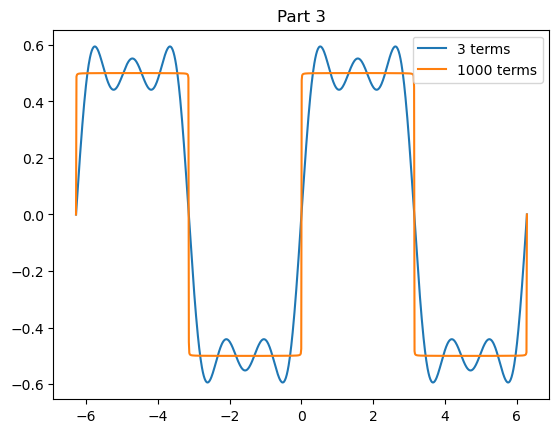

In [2]:
#Part 3
time = np.linspace(-2*np.pi,2*np.pi,1000)
n = 1000                             #number of terms

def f(t,n):
    F = 0
    for i in range(n):
        odd = (2*(i) + 1)            #odd numbers associated with each term
        F += (1/odd)*np.sin(odd*t)   #sum of (1/odd#)sin(odd#*t)
    return (2/np.pi)*F

#Graph
plt.plot(time,f(time,3),label= "3 terms")
plt.plot(time,f(time,n),label = str(n)+" terms")
plt.legend()
plt.title("Part 3")

# Problem 4
The Fourier coefficients of a "sawtooth" function are given by $a_n = 0$, $b_n = (2/n \pi)(-1)^{n-1}$, i.e.,
\begin{equation*}
f(t) = \frac{t}{\pi}, ~~ -\pi < t < \pi
\end{equation*}
Plot the Fourier series and confirm the result.

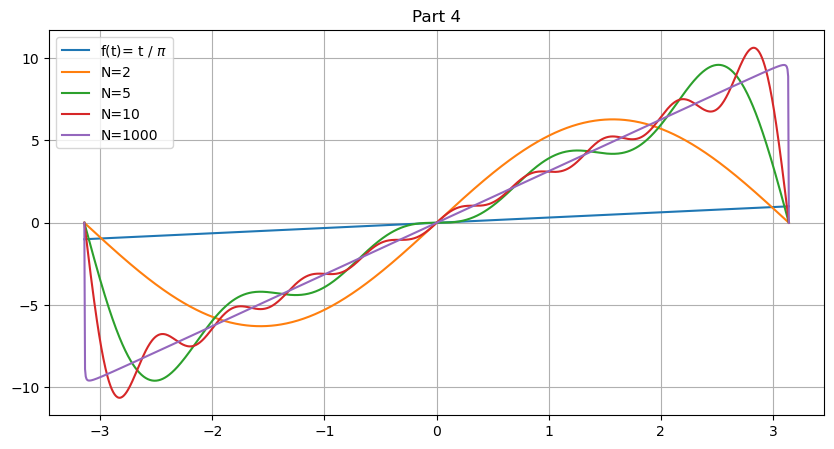

In [5]:
#part 4
t4 = np.linspace(-np.pi,np.pi,1000)
an4 = 0
T = 2*np.pi
omega = 2*np.pi/T
N = [2,5,10,1000]

def bn4(n):                            #b_n = (2/n*pi)(-1)^(n-1)
    return (2/n*np.pi)*((-1)**(n-1))

def fourier(bn,N,t):
    s = 0
    for k in range(1,N):
        s += bn(k)*np.sin(k*omega*t)  #b_n*sin(k*omega*t)
    return s

def f4(t):
    return t/np.pi

#graph
plt.figure(figsize=(10,5))
plt.plot(t4,f4(t4),label= "f(t)= t / $\pi$")
for l in range (len(N)):
    plt.plot(t4,fourier(bn4,N[l],t4),label = "N="+str(N[l]))
plt.title("Part 4")
plt.legend()
plt.grid()